<a href="https://colab.research.google.com/github/Rtniewi/advanced-data-ADVDS/blob/main/HW1/ADS_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 792
//10/29/2025
//Project 1
####The purpose of this assignment is to create a linear regression model and compare regression accuracies using the Forest Fires Data Set.

Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

Load the Forest Fires Data Set

In [5]:
# Load the data
forest_firesDS  = pd.read_csv("/content/forestfires.csv");

forest_firesDS.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# **Area and Temperature**

An example below of when Area is not normalized and skews the data. Normalized Area will be used for the rest of the attributes (RH, Wind, and Rain)

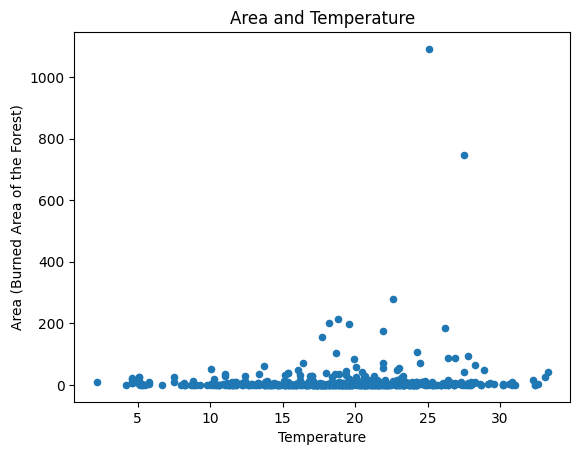

LinearRegression()

In [6]:
# Prepare the data
X = np.c_[forest_firesDS["temp"]]
y = np.c_[forest_firesDS["area"]]

# Visualize the data
forest_firesDS.plot(kind='scatter', x="temp", y='area')
plt.ylabel("Area (Burned Area of the Forest)")
plt.xlabel("Temperature")
plt.title("Area and Temperature")
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

Normalize using Log Transform: This will improve the density of the data being skewed.

In [8]:
norm_area = pd.DataFrame(forest_firesDS["area"])

forest_firesDS["norm_area"] = np.log10(norm_area + 1);

# **Area (Normalized) and Temperature: Updated Model using Normalized Area**

Linear Regression Model: Area(Normalized) and Temperature

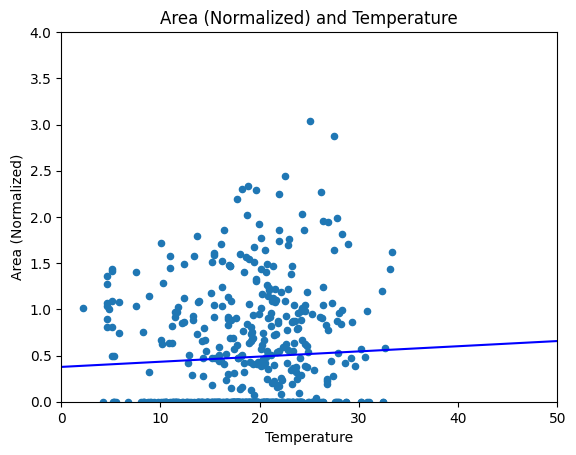

In [24]:
#Linear Regression Model
lin_mod1 = linear_model.LinearRegression()
X = np.c_[forest_firesDS["temp"]]
y = np.c_[forest_firesDS["norm_area"]]
lin_mod1.fit(X,y)

t01, t1 = lin_mod1.intercept_[0], lin_mod1.coef_[0][0]

#Plot the Linear Regression Model
forest_firesDS.plot(kind='scatter', x="temp", y='norm_area')
plt.title("Area (Normalized) and Temperature")
plt.xlabel("Temperature")
plt.ylabel("Area (Normalized)")
plt.axis([0, 50, 0, 4])
X=np.linspace(0, 50, 1000)
plt.plot(X, t01 + t1*X, "b")

plt.show()

## 80-20 holdout, R2, AND MSE values

In [10]:
X = np.c_[forest_firesDS["temp"]]
y = np.c_[forest_firesDS["norm_area"]]

#80-20 holdout to technique to test the validity of the model
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                          test_size = 0.2,
                                                          random_state = 100)
lin_mod1.fit(x_train, y_train)

#Intercept and Slope
print("Intercept :",lin_mod1.intercept_)
print('Slope :',lin_mod1.coef_)

# train the model using the training set
y_train_pred = lin_mod1.predict(x_train)

# make predictions using the testing set
y_test_pred = lin_mod1.predict(x_test)

# R2 score and MSE score
tempR2 = r2_score(y_test, y_test_pred)
tempMSE = mean_squared_error(y_test, y_test_pred)

print('R2 score:', tempR2)
print('Mean squared error:', tempMSE)

Intercept : [0.3657534]
Slope : [[0.00652634]]
R2 score: -0.004574997224866095
Mean squared error: 0.33721489144635675


# **Area and Relative Humidity(RH)**

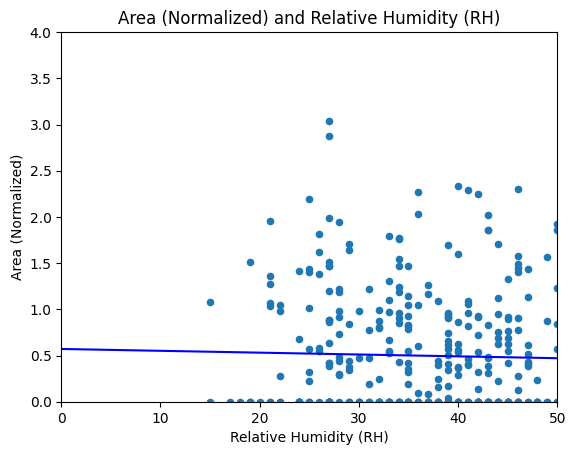

In [14]:
#Linear Regression Model
lin_mod2 = linear_model.LinearRegression()
X = np.c_[forest_firesDS["RH"]]
y = np.c_[forest_firesDS["norm_area"]]
lin_mod2.fit(X,y)

t02, t2 = lin_mod2.intercept_[0], lin_mod2.coef_[0][0]

#Plot the Linear Regression Model
forest_firesDS.plot(kind='scatter', x="RH", y='norm_area')
plt.title("Area (Normalized) and Relative Humidity (RH)")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Area (Normalized)")
plt.axis([0, 50, 0, 4])
X=np.linspace(0, 50, 1000)
plt.plot(X, t02 + t2*X, "b")

plt.show()

## 80-20 holdout, R2, AND MSE values

In [15]:
X = np.c_[forest_firesDS["RH"]]
y = np.c_[forest_firesDS["norm_area"]]

#80-20 holdout to technique to test the validity of the model
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                          test_size = 0.2,
                                                          random_state = 100)
lin_mod2.fit(x_train, y_train)

#Intercept and Slope
print("Intercept :",lin_mod2.intercept_)
print('Slope :',lin_mod2.coef_)

# train the model using the training set
y_train_pred = lin_mod2.predict(x_train)

# make predictions using the testing set
y_test_pred = lin_mod2.predict(x_test)

# R2 score and MSE score
RHR2 = r2_score(y_test, y_test_pred)
RHMSE = mean_squared_error(y_test, y_test_pred)

print('R2 score:', RHR2)
print('Mean squared error:', RHMSE)

Intercept : [0.5682677]
Slope : [[-0.00181982]]
R2 score: 0.002807391126103842
Mean squared error: 0.33473677752428593


# **Area and Wind**

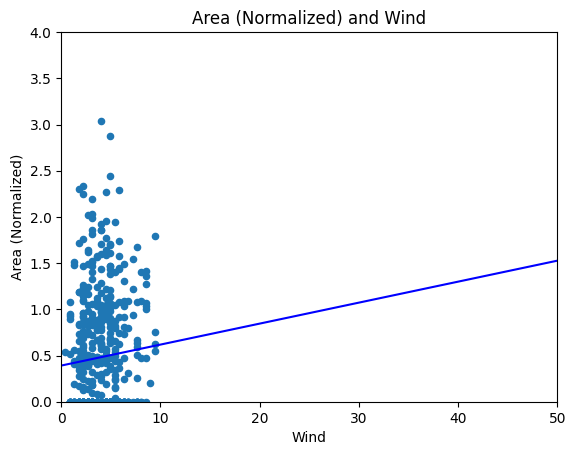

In [17]:
#Linear Regression Model
lin_mod3 = linear_model.LinearRegression()
X = np.c_[forest_firesDS["wind"]]
y = np.c_[forest_firesDS["norm_area"]]
lin_mod3.fit(X,y)

t03, t3 = lin_mod3.intercept_[0], lin_mod3.coef_[0][0]

#Plot the Linear Regression Model
forest_firesDS.plot(kind='scatter', x="wind", y='norm_area')
plt.title("Area (Normalized) and Wind")
plt.xlabel("Wind")
plt.ylabel("Area (Normalized)")
plt.axis([0, 50, 0, 4])
X=np.linspace(0, 50, 1000)
plt.plot(X, t03 + t3*X, "b")

plt.show()

## 80-20 holdout, R2, AND MSE values

In [18]:
X = np.c_[forest_firesDS["wind"]]
y = np.c_[forest_firesDS["norm_area"]]


#80-20 holdout to technique to test the validity of the model
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                          test_size = 0.2,
                                                          random_state = 100)
lin_mod3.fit(x_train, y_train)

#Intercept and Slope
print("Intercept :",lin_mod3.intercept_)
print('Slope :',lin_mod3.coef_)

# train the model using the training set
y_train_pred = lin_mod3.predict(x_train)

# make predictions using the testing set
y_test_pred = lin_mod3.predict(x_test)

# R2 score and MSE score
windR2 = r2_score(y_test, y_test_pred)
windMSE = mean_squared_error(y_test, y_test_pred)

print('R2 score:', windR2)
print('Mean squared error:', windMSE)

Intercept : [0.39716962]
Slope : [[0.02255892]]
R2 score: 0.0023451377048031574
Mean squared error: 0.33489194636455694


# **Area and Rain**

I tried normailzing rain but it didn't seem to affect the values.

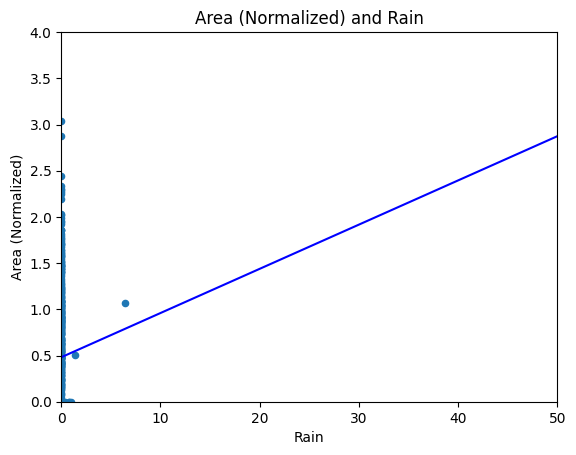

In [20]:
#Linear Regression Model
lin_mod4 = linear_model.LinearRegression()
X = np.c_[forest_firesDS["rain"]]
y = np.c_[forest_firesDS["norm_area"]]
lin_mod4.fit(X,y)

t04, t4 = lin_mod4.intercept_[0], lin_mod4.coef_[0][0]

#Plot the Linear Regression Model
forest_firesDS.plot(kind='scatter', x="rain", y='norm_area')
plt.title("Area (Normalized) and Rain")
plt.xlabel("Rain")
plt.ylabel("Area (Normalized)")
plt.axis([0, 50, 0, 4])
X=np.linspace(0, 50, 1000)
plt.plot(X, t04 + t4*X, "b")
#plt.ylabel("Area (Burned Area of the Forest)")

plt.show()


## 80-20 holdout, R2, AND MSE values

In [21]:
X = np.c_[forest_firesDS["rain"]]
y = np.c_[forest_firesDS["norm_area"]]


#80-20 holdout to technique to test the validity of the model
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                          test_size = 0.2,
                                                          random_state = 100)
lin_mod4.fit(x_train, y_train)

#Intercept and Slope
print("Intercept :",lin_mod4.intercept_)
print('Slope :',lin_mod4.coef_)

# train the model using the training set
y_train_pred = lin_mod4.predict(x_train)

# make predictions using the testing set
y_test_pred = lin_mod4.predict(x_test)

# R2 score and MSE score
rainR2 = r2_score(y_test, y_test_pred)
rainMSE = mean_squared_error(y_test, y_test_pred)

print('R2 score:', rainR2)
print('Mean squared error:', rainMSE)

Intercept : [0.48714565]
Slope : [[0.05310546]]
R2 score: -0.0033158753354052273
Mean squared error: 0.33679223046788803


# **Tabulated Results to Compare Regression Accuracies**

In [22]:
# dataframe of Results
data = {'Value': ['Temperature', 'Relative Humidity', 'Wind', 'Rain'],
        'Slope Values': [t1, t2, t3, t4],
        'Intercept Values': [t01, t02, t03, t04],
        'R2 Values': [tempR2, RHR2, windR2, rainR2],
        'MSE Values': [tempMSE, RHMSE, windMSE, rainMSE]}

df = pd.DataFrame(data)
df_rounded = df.round(3)

df_rounded


,Value,Slope Values,Intercept Values,R2 Values,MSE Values
0,Temperature,0.006,0.377,-0.005,0.337
1,Relative Humidity,-0.002,0.571,0.003,0.335
2,Wind,0.023,0.391,0.002,0.335
3,Rain,0.048,0.481,-0.003,0.337


# **Regression Accuracies Analysis**

The MSE values are mostly the same, with a minimal difference for all four models. Relative Humidity and Wind have a prediction error of .335, and Temperature and Rain have a prediction error of .337. Relative Humidity and Rain have a lower MSE and would be considered a satisfactory representation of the model with data that has minimal larger errors.


The four models have varying R2 scores. Temperature and Rain are both in the negatives, indicating a poor model representation. None of the R2 values are very significant, as the highest value is 0.003 compared to a perfect fit of 1. As Temperature and Rain have negative R2 values, it would make sense that they also have higher prediction errors for their MSE.


# **Concluding Remarks**

By comparing the four models' regression accuracies, the Relative Humidity's Linear Regression model performed the best. It had the highest R2 values and the lowest MSE value, which represented the data the best.

The worst performing model was Temperature, as it has the lowest R2 value and the highest MSE value. From looking at the graph representation, many of the data points are spread out and not represented accurately.

Another model that was not represented well was Rain. Rain had many 0 values, skewing the data to one side. It seems that models with skewed or outlier data are not displayed well by a linear regression model, as a single line cannot represent the data well.
